# Analysis of test results

[{'epoch': 25.0, 'learning_rate': 3.7500000000000003e-05, 'loss': 0.9662, 'step': 100}, {'epoch': 50.0, 'learning_rate': 2.5e-05, 'loss': 0.5223, 'step': 200}, {'epoch': 75.0, 'learning_rate': 1.25e-05, 'loss': 0.4893, 'step': 300}, {'epoch': 100.0, 'learning_rate': 0.0, 'loss': 0.4757, 'step': 400}, {'epoch': 100.0, 'step': 400, 'total_flos': 174395167211520.0, 'train_loss': 0.6133902263641358, 'train_runtime': 52.8436, 'train_samples_per_second': 227.085, 'train_steps_per_second': 7.57}]
[0.9662, 0.5223, 0.4893, 0.4757]
[25.0, 50.0, 75.0, 100.0]


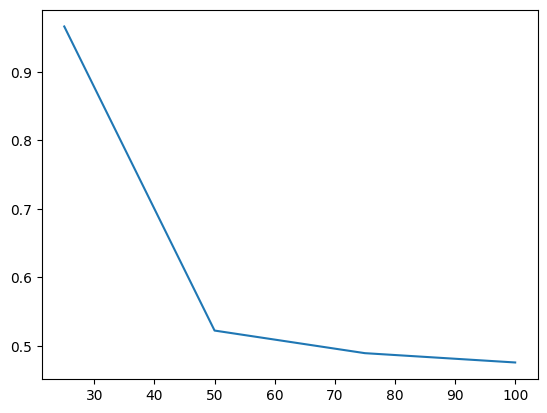

In [6]:
import pandas as pd
import json
from pyprojroot.here import here
import matplotlib.pyplot as plt

with open(here('datamodels/models/61-32-100/trainer_state.json'), 'rb') as file:
    trainer_state = json.load(file)

trainer_state.keys()

loss_hist = trainer_state['log_history'].copy()

print(loss_hist)
loss_hist.pop()

loss = [x["loss"] for x in loss_hist]
epochs = [x["epoch"] for x in loss_hist]

print(loss)
print(epochs)

plt.plot(epochs, loss)


In [7]:
from be_great import GReaT

model = GReaT.load_from_dir(str(here('datamodels/models/61-32-100')))

sampled = model.sample(150)


200it [00:00, 255.27it/s]                         


In [8]:
orig = pd.read_csv(here('data/original/61.csv'), index_col = False)

orig.head()



,Unnamed: 0,sepallength,sepalwidth,petallength,petalwidth,class
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Iris-setosa
2,2,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
sampled.head()

,Unnamed: 0,sepallength,sepalwidth,petallength,petalwidth,class
0,126.0,7.8,2.8,5.4,2.0,Iris-virginica
1,5.0,5.1,3.3,1.4,0.2,Iris-setosa
2,87.0,6.9,2.4,4.1,1.3,Iris-versicolor
3,93.0,6.0,3.7,4.5,1.4,Iris-virginica
4,38.0,6.4,3.1,4.8,1.5,Iris-versicolor
